In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LDA:

    def __init__(self, n_components) -> None:
        self.n_components = n_components
        self.lda_components = None

    def fit(self, X, y):
        
        class_labels = np.unique(y)
        print("Unique class labels : ",class_labels)
        
        overall_mean = np.mean(X, axis=0)
        print("Overall mean corrosponds to each feature : \n",overall_mean)
        features_X = X.shape[1]
        print("No. of features in Dataset :",features_X)

        
        sw = np.zeros((features_X, features_X)) 
        sb = np.zeros((features_X, features_X))


        for cl in class_labels:
            X_cl = X[y == cl]
            mean_cl = np.mean(X_cl, axis=0)
            print("Mean vector : \n", mean_cl, "for class ",cl)

            
            sw += np.dot((X_cl - mean_cl).T, (X_cl - mean_cl))
            print("within class scatter matrix \n",sw, "after class ",cl)


            n_cl = X_cl.shape[0] 
            mean_diff = (mean_cl - overall_mean).reshape(features_X, 1)
            sb += n_cl * np.dot(mean_diff, mean_diff.T)
            print("Between class scatter matrix \n",sb, "after  class",cl)


        sw_inv = np.linalg.inv(sw)
        print("\n Inverse of sw matrix : \n",sw_inv)
        mat = np.dot(sw_inv, sb)
        print("Value of matrix after sw^-1*sb : ",mat)
        eigen_values, eigen_vectors = np.linalg.eig(mat)
        print("Eigen values ",eigen_values, "eigen vectors : ",eigen_vectors)

        
        idxs = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[idxs]
        eigen_vectors = eigen_vectors[:, idxs]

        print("Sorted Eigenvalues:\n", eigen_values)
        print("Sorted Eigenvectors:\n", eigen_vectors)


        self.lda_components = eigen_vectors[:, :self.n_components]
        print(f"Selected {self.n_components} components:\n", self.lda_components)

    def transform(self, X):
        
        transformed_data = np.dot(X, self.lda_components)
        return transformed_data

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target


X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
standard_X = (X - X_mean) / X_std


lda = LDA(n_components=2)
lda.fit(standard_X, y)


transformed_X = lda.transform(standard_X)


print("Transformed X:\n", transformed_X)

Unique class labels :  [0 1 2]
Overall mean corrosponds to each feature : 
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
No. of features in Dataset : 4
Mean vector : 
 [-1.01457897  0.85326268 -1.30498732 -1.25489349] for class  0
within class scatter matrix 
 [[ 8.93848387 13.56019444  0.55191376  0.80736832]
 [13.56019444 37.30958729  0.74996295  1.38052737]
 [ 0.55191376  0.74996295  0.47740227  0.22250381]
 [ 0.80736832  1.38052737  0.22250381  0.94293708]] after class  0
Between class scatter matrix 
 [[ 51.46852417 -43.2851185   66.20063455  63.65942715]
 [-43.2851185   36.40286008 -55.674849   -53.53768915]
 [ 66.20063455 -55.674849    85.14959552  81.88100476]
 [ 63.65942715 -53.53768915  81.88100476  78.73788359]] after  class 0
Mean vector : 
 [ 0.11228223 -0.66143204  0.28532388  0.1667341 ] for class  1
within class scatter matrix 
 [[28.10567527 25.20250388  6.72392664  5.16671066]
 [25.20250388 62.87752824  6.04889866  7.49836048]
 [ 6.72392664  6.048

In [5]:
print("Original shape:", X.shape)
print("Transformed shape:", transformed_X.shape)

Original shape: (150, 4)
Transformed shape: (150, 2)


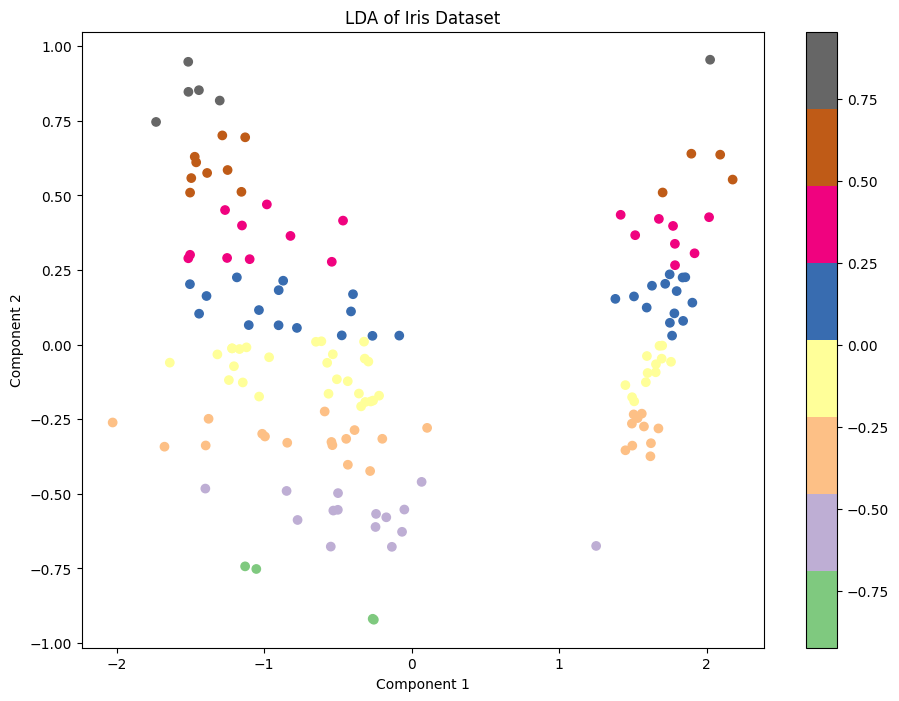

In [7]:
X= transformed_X[:, 0]
y= transformed_X[:, 1]

plt.figure(figsize=(11, 8))
scatter = plt.scatter(X, y, c=y, cmap='Accent')
plt.xlabel(f'Component 1')
plt.ylabel(f'Component 2')
plt.title('LDA of Iris Dataset')
plt.colorbar(scatter)
plt.show()